<a href="https://colab.research.google.com/github/babujyothi/prasanna/blob/main/Twitter_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Sentiment Analysis and Topic Modeling of Tweets

## Twitter Web Scrapping

### Why Twitter Data?

Twitter is a goldmine for data analysts due to its real-time nature, diverse user base, and the wide range of topics discussed. Whether it’s tracking the latest trends, understanding public sentiment, or conducting market research, Twitter data can provide valuable insights.


## Description:
This project analyzes tweets from the official Twitter handle of the University of Hyderabad (@HydUniv).
The objective is to extract insights, assess public sentiment, and identify key topics discussed in the tweets.

## Use Case:
Universities, like any public institution, need to understand public perception and engagement on social media.
By analyzing the sentiment and topics of tweets, decision-makers can:
1. Measure public opinion.
2. Identify trending topics and concerns.
3. Improve communication strategies based on sentiment and engagement metrics.

## Problem Statement:
Social media platforms like Twitter generate massive data, but extracting meaningful insights is challenging due to:
1. Large volumes of unstructured text data.
2. The need for real-time sentiment and topic analysis.
3. Lack of tools to identify trends and public sentiment effectively.

## Solution:
This project uses Python and relevant libraries to:
1. Fetch tweets using the Twitter API.
2. Perform sentiment analysis using TextBlob.
3. Categorize tweets into positive, negative, and neutral sentiments.
4. Conduct topic modeling using Latent Dirichlet Allocation (LDA) to uncover underlying themes.

## Steps in the Project:
1. Data Collection
2. Sentiment Analysis
3. Topic Modeling


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pip install tweepy

In [50]:
# Import Required Libraries
import tweepy
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import re

In [51]:
# Replace with your own credentials
consumer_key = 'U6WRdQcoc92dsZ4f43KhQEArQ'
consumer_secret = 'I3SFWDxNhsnoxC9vW2PSwrBPkPgtioOPfN5vWcgZeNzQ64bHHb'
access_token = '1660514647760572416-Zz4GQoAR62VDFco6TSt9nj5y7jqqV9'
access_token_secret = 'NAFpgFz4YLxc3fXOOBryKnsP42XeNUpwvlgRw4eMO3NSC'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAEhAwwEAAAAAhdJEsl3TN2oRd9cPdyNQLMjrDAM%3DulqI7gzKJoHc4kGEilelRnSDY6Nbr7qEBkX4dBuZMtDkGsbJn6'

In [52]:

# Replace with your own credentials
consumer_key = 'CPCInEA4qrlWZa3jlMPoI4xxf'
consumer_secret = 'fDX8iU7Y3kgJf3INyKD6qRBoTWrnsLXVytmZcruBkho06b9cYw'
access_token = '1850534742338473984-grK9aHQziTFVgs371vAvISI3lg2fBO'
access_token_secret = 'auFnku5HxJrwE7Ft8S8xecfiR5KCoTSQwOubSaR7Ndm97'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAI6vwwEAAAAAT0QJpWDyNuNCdj83act6EbNrpDg%3DxDOg44iQ1NVZ58jt3nU1A5frJyAin9Ssq3Nnka0cqBxYlhJn5k'

# 1. Data Collection


In [53]:
# Initialize Twitter API Client
client = tweepy.Client(bearer_token=bearer_token)

In [10]:
# Fetch Tweets from the User Handle
user_name = 'HydUniv'
user = client.get_user(username=user_name)

In [ ]:
# Search for tweets from the user 'Username'
user_name = 'HydUniv'
user = client.get_user(username=user_name)
if user.data:
  user_id = user.data.id
  tweets = client.get_users_tweets(id=user_id, max_results=100, tweet_fields=['text'])

  if tweets.data:
    for tweet in tweets.data:
        print(tweet.text)
  else:
    print("No tweets found for the user.")
else:
    print("User not found.")

The NSS cell, University of Hyderabad organized a cleanup drive programme on the premises of the School of Humanities in coordination with the Horticulture and Sanitation departments on November 16, 2024. 

The NSS volunteers cut and removed the unnecessary plants, branches of… https://t.co/coS2qNugjh https://t.co/lIg29a3rfk
RT @EduMinOfIndia: Hon'ble Union Minister for Education, Shri @dpradhanbjp, chaired a meeting to deliberate upon a comprehensive action pla…
RT @uohpolsci: Ms. Bhoomi Sharma, 2nd year Master's student, undertook an internship with National Human Rights Commission (NHRC) in August…
RT @uohpolsci: Tabula Rasa - Another name for fresh beginnings!

With a night packed with  simmering zeal, dancing melodies, awe-inspiring…
RT @EduMinOfIndia: जनजातीय गौरव दिवस के अवसर पर आयोजित कार्यक्रम में माननीय प्रधानमंत्री श्री @narendramodi ने संबोधित करते हुए कहा कि बीते…
At SSCTU in Mulugu. https://t.co/ADOLRJiwUv
RT @dpradhanbjp: Research is key for expanding the coverage of wel

In [ ]:
if tweets.data:
  tweet_list = []
  for tweet in tweets.data:
    tweet_dict = {
        'Tweet Text': tweet.text,
        # Add other relevant fields here like 'created_at', 'author_id', etc.
    }
    tweet_list.append(tweet_dict)

  df = pd.DataFrame(tweet_list)

  # Convert the DataFrame to a CSV file
  df.to_csv('uoh_tweets.csv', index=False)  # 'tweets.csv' is the file name
  print("Tweets saved to tweets.csv")
else:
  print("No tweets found to create DataFrame.")

Tweets saved to tweets.csv


# Extracting Tweets without API keys

### Introducing ntscraper

ntscraper is a Python library designed to scrape tweets directly from Twitter without the need for official APIs. This makes it incredibly accessible and easy to use, especially for those just starting in data science.
Key Features of ntscraper:

    No API Keys Required: Avoids the hassle of dealing with API rate limits and authorization.
    Real-Time Data: Fetches the latest tweets as they are posted.
    CSV Conversion: Easily converts scraped data into CSV format for analysis.

In [13]:
# Install the ntscraper package to enable scraping from Twitter
!pip install ntscraper

In [14]:
# Import Pandas to work with data in tabular format
# Import Nitter class from ntscraper to scrape tweets
import pandas as pd
from ntscraper import Nitter

In [15]:
# Create an instance of Nitter class to start scraping
scraper = Nitter()

Testing instances: 100%|██████████| 14/14 [00:16<00:00,  1.19s/it]


In [19]:
# Define a function to scrape and format tweets
# Fetch the tweets based on the provided parameters
def get_tweets(name,modes,no):
    tweets = scraper.get_tweets(name, mode = modes, number=no)

# Initialize an empty list to store formatted tweet data
    final_tweets = []
    for tweet in tweets['tweets'] :

# Extract link, text, date, likes, and comments from each tweet
        data = [tweet['link'], tweet['text'], tweet['date'], tweet['stats']['likes'], tweet['stats']['comments']]
# Append the extracted data to the final list
        final_tweets.append(data)
# Convert the list of tweets into a Pandas DataFrame with defined columns
    data = pd.DataFrame(final_tweets, columns =['link','text','date','No_of_Likes','No_of_tweets'])
    return data



In [20]:
#we can extract Tweets using user, term or Hashtag from twitter
data = get_tweets('elonmusk','user',150)

INFO:root:No instance specified, using random instance https://nitter.privacydev.net
INFO:root:Current stats for elonmusk: 21 tweets, 0 threads...


In [21]:
data

,link,text,date,No_of_Likes,No_of_tweets
0,https://twitter.com/elonmusk/status/1853614981...,Worth listening to this @JoeRogan episode befo...,"Nov 5, 2024 · 1:47 AM UTC",123595,5487
1,https://twitter.com/elonmusk/status/1853691543...,Below are the R minus D early vote deltas in s...,"Nov 5, 2024 · 6:51 AM UTC",27582,2604
2,https://twitter.com/beeple/status/185366319074...,LAST PUSH,"Nov 5, 2024 · 4:58 AM UTC",16609,1167
3,https://twitter.com/elonmusk/status/1853688868...,This platform is the top source of news on Earth!,"Nov 5, 2024 · 6:40 AM UTC",20997,2245
4,https://twitter.com/america/status/18536138266...,ELON MUSK: “Go out there and vote... for Peanu...,"Nov 5, 2024 · 1:42 AM UTC",9340,503
5,https://twitter.com/elonmusk/status/1853688289...,"Congratulations, Joshua of Arizona!","Nov 5, 2024 · 6:38 AM UTC",19351,1160
6,https://twitter.com/TrumpWarRoom/status/185368...,"PRESIDENT TRUMP: ""To every citizen across this...","Nov 5, 2024 · 6:14 AM UTC",9997,634
7,https://twitter.com/AutismCapital/status/18536...,We've uploaded all of the Joe Rogan x Elon Mus...,"Nov 5, 2024 · 6:25 AM UTC",5280,370
8,https://twitter.com/elonmusk/status/1853685052...,Great speech by @MegynKelly!,"Nov 5, 2024 · 6:25 AM UTC",26082,1346
9,https://twitter.com/elonmusk/status/1853679967...,Vote to preserve democracy!,"Nov 5, 2024 · 6:05 AM UTC",42200,2385


In [22]:
data.to_csv('elonmuskdata.csv')

# 2. Preprocessing

In [44]:
def preprocess_text(text):
    """
    Preprocesses text by:
    1. Removing URLs.
    2. Removing mentions and hashtags.
    3. Removing special characters and digits.
    4. Converting text to lowercase.
    """
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions (@username) and hashtags (#hashtag)
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [56]:
# Load Data
data = pd.read_csv('/content/elonmuskdata.csv')

# Apply Preprocessing
data['Cleaned Tweet Text'] = data['text'].apply(preprocess_text)

# Save Preprocessed Data
data.to_csv('preprocessed_elonmuskdata.csv', index=False)
print("Preprocessed data saved to 'preprocessed_elonmuskdata.csv'.")

Preprocessed data saved to 'preprocessed_elonmuskdata.csv'.


# Sentiment Analysis of Tweets

for sentiment analysis we are Using Textblob is a popular Python library for natural language processing (NLP) that provides easy-to-use tools for tasks like sentiment analysis, part-of-speech tagging, noun phrase extraction, translation,

### Sentiment scores typically range from -1 to 1:

    Positive Sentiment (0 to 1): A score closer to 1 indicates the tweet conveys a positive emotion. For example, the tweet at 1:42 PM UTC has a sentiment of 0.488, which is fairly positive.
    Neutral Sentiment (0): A score of 0 represents neutral sentiment—neither positive nor negative emotions are detected. The tweet at 8:35 AM UTC with a sentiment of 0.000 is neutral.
    Negative Sentiment (-1 to 0): A score closer to -1 indicates the tweet conveys negative emotion. None of the tweets in the provided data have a negative sentiment, but if there were, you’d see negative values here.

# Sentiment Analysis for UOH Tweets

In [ ]:
import pandas as pd

In [ ]:
# Load data (assuming your data is in a CSV file named 'data.csv')
data = pd.read_csv('/content/uoh_tweets.csv')

Sentiment_Category
Positive    54
Neutral     41
Negative     2
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Analysis on University of Hyderabad Tweets'}, xlabel='Sentiment_Category'>

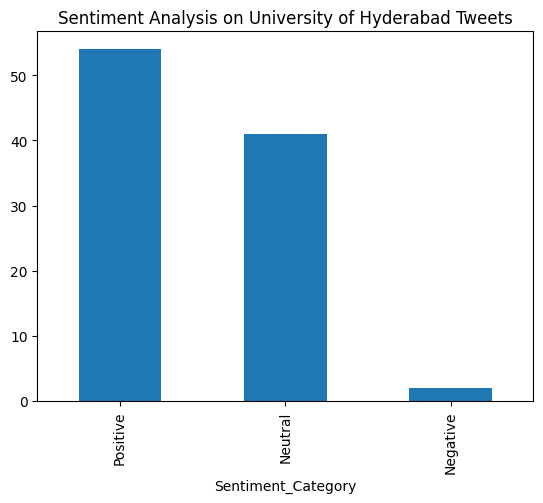

In [ ]:
from textblob import TextBlob

# Sentiment Analysis
data['Sentiment'] = data['Tweet Text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Categorize Sentiment
data['Sentiment_Category'] = data['Sentiment'].apply(lambda polarity: 'Positive' if polarity > 0 else ('Negative' if polarity < 0 else 'Neutral'))

# Display sentiment distribution
print(data['Sentiment_Category'].value_counts())

# Visualize sentiment distribution
data['Sentiment_Category'].value_counts().plot(kind='bar', title='Sentiment Analysis on University of Hyderabad Tweets')

# Sentiment Analysis for Elonmusk Tweets

In [23]:
from textblob import TextBlob

In [57]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/preprocessed_elonmuskdata.csv')

Sentiment_Category
Positive    11
Neutral      8
Negative     2
Name: count, dtype: int64


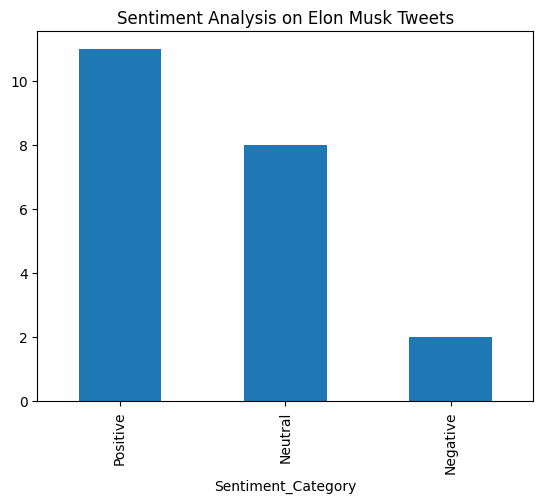

In [58]:
# Perform sentiment analysis using TextBlob
df['Sentiment'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Categorize sentiment
df['Sentiment_Category'] = df['Sentiment'].apply(lambda polarity: 'Positive' if polarity > 0 else ('Negative' if polarity < 0 else 'Neutral'))

# Display sentiment distribution
print(df['Sentiment_Category'].value_counts())

# Visualize sentiment distribution
df['Sentiment_Category'].value_counts().plot(kind='bar', title='Sentiment Analysis on Elon Musk Tweets')
plt.show()

# Topic Modeling for UOH Tweets

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocess Tweets
vectorizer = CountVectorizer(stop_words='english')
# Use the 'Tweet Text' column instead of the file path
X = vectorizer.fit_transform(data['Tweet Text'])

# Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display Topics
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic #0
['cell', 'coes', 'digitalcitizensummit', 'hosted', 'ai', '2024', 'defindia', 'amp', 'rt', 'https']
Topic #1
['sciences', 'physics', '2024', 'prof', 'school', 'rt', 'uoh', 'hyderabad', 'university', 'https']
Topic #2
['rt', '2024', 'prof', 'department', 'sciences', 'school', 'dr', 'hyderabad', 'university', 'https']
Topic #3
['https', 'shri', 'union', 'minister', 'hon', 'ble', 'dpradhanbjp', 'eduminofindia', 'education', 'rt']
Topic #4
['india', 'school', 'hyderabad', 'physics', '2024', 'education', 'university', 'dpradhanbjp', 'https', 'rt']


## Topic modelling for elonmusk data

In [35]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/elonmuskdata.csv')

In [40]:
# Preprocess Tweets
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

In [41]:
# Apply LDA for Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [42]:
# Display Topics
print("\nIdentified Topics:")
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Identified Topics:
Topic #1:
['tomorrow', 'swing', 'states', 'early', 'turnout', 'leaning', 'day', 'trump', 'election', 'vote']
Topic #2:
['defeat', 'body', 'asking', 'save', 'washington', 'love', 'fight', 'land', 'great', 'president']
Topic #3:
['musk', 'swing', 'states', 've', 'real', 'democracy', 'elon', 'tomorrow', 'win', 'vote']
Topic #4:
['absolutely', 'push', 'fraud', 'reason', 'impossible', 'make', 'ban', 'prove', 'voter', 'id']
Topic #5:
['pets', 'fucking', 'thinking', 'dollars', 'america', 'end', 'vote', 'free', 'musk', 'elon']


# Conclusion

This project successfully analyzed the sentiment and topics of tweets from the University of Hyderabad. Key outcomes include:
1. Categorization of tweets into positive, negative, and neutral sentiments.
2. Identification of trending topics discussed in the tweets.

## Applications:
1. Help the university refine its social media strategies.
2. Improve student and public engagement based on sentiment insights.
3. Inform university stakeholders about emerging themes or concerns.